In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os
import re


from hydro_emu.pca import *
from hydro_emu.viz import *
from hydro_emu.load_hacc import *
from hydro_emu.emu import *
from hydro_emu.gp import *
# from hydro_emu.mcmc import *

# Load files -- all summary stats

In [2]:
DirIn = '../../Data/ProfileData/SCIDAC_RUNS/128MPC_RUNS_FLAMINGO_DESIGN_2_NO_PROP/'
# DirIn = '../../Data/ProfileData/SCIDAC_RUNS/128MPC_RUNS_FLAMINGO_DESIGN_2_NO_PROP_NEW_BINS/'
DirIn = '../../Data/ProfileData/SCIDAC_RUNS/128MPC_RUNS_FLAMINGO_DESIGN_3A/' 
## 3A (low SeedMass) or 3B (high SeedMass)

DirIn = '../../Data/ProfileData/SCIDAC_RUNS/128MPC_RUNS_HACC_5PARAM_extract2_Pk/'

num_sims = 64
exp_variance = 0.9999 # 0.9999 #0.95
side_length = 128 #Mpc/h
Npart =  512

if_plot_sensi = False

In [3]:
import os
import numpy as np
import re


# pattern = re.compile(r'FSN_(\d+\.\d+|10|0)_VEL_(\d+\.\d+)_TEXP_(\d+\.\d+|10|0)_BETA_(\d+\.\d+|0)_SEED_(\d+\.?\d*e[\+\-]?\d+)')
# Regular expression pattern
pattern = re.compile(r'KAPPA_(\d+\.?\d*)_EGW_(\d+\.?\d*)_SEED_([\d\.eE\+\-]+)_VKIN_([\d\.]+)_EPS_([\d\.eE\+\-]+)')

def read_params_from_files(pattern):
    # List to store the extracted values
    data = []
    # Loop through each subdirectory name in the directory
    for subdirectory_name in os.listdir(DirIn):
        # print(f"Checking: {subdirectory_name}")
        match = pattern.match(subdirectory_name)
        if match:
            # print(f"Matched: {subdirectory_name}")
            data.append([float(match.group(1)), float(match.group(2)), float(match.group(3).replace('e', 'E')),
                        float(match.group(4)), float(match.group(5).replace('e', 'E'))])
        else:
            print(f"No match: {subdirectory_name}")
    # Convert the list to a numpy array
    params_all = np.array(data)

    return params_all

params32 = read_params_from_files(pattern)

# seed_mass_scale = 1e6
# vkin_scale = 1e4
# eps_scale = 1e1

params32[:, 2] = params32[:, 2]/seed_mass_scale
params32[:, 3] = params32[:, 3]/vkin_scale
params32[:, 4] = params32[:, 4]/eps_scale

No match: EXTRACT_DATA
No match: COPY_RUNS
No match: UV_DATA
No match: rsync_down.txt
No match: GRAV_ONLY


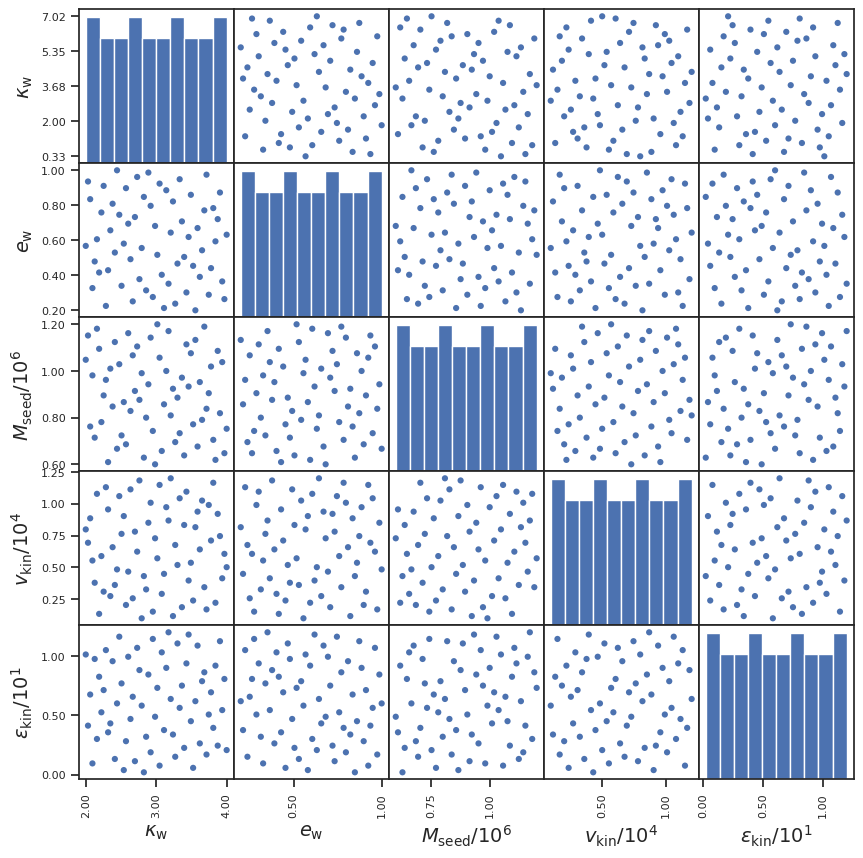

In [4]:
# Print the numpy array

if_separate_param_file = False

if if_separate_param_file:
    params32 = load_params('../../Data/flamingo_log_design2.txt')
    
    
df_train_a = pd.DataFrame(params32, columns=PARAM_NAME)
colors = ['b']*params32.shape[0]
# colors = ['b']*num_sims + ['r']*num_sims_test
plot_scatter_matrix(df_train_a, colors);
plt.savefig('plots/universal/exp_design.png', bbox_inches='tight')

In [5]:
k, pk_all, pk_ratio = read_pk(DirIn, num_sims, params32)

(0.04908738521234052, 12.566370614359172, 0.06952845, 21.73729)

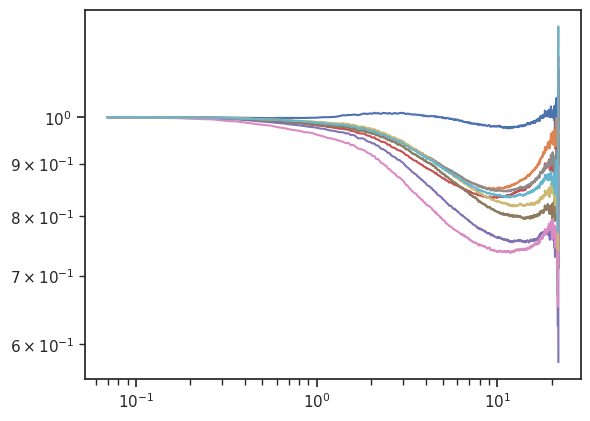

In [6]:
plt.plot(k, pk_ratio[0:10].T)
plt.xscale('log')
plt.yscale('log')

k_min = 2*np.pi/side_length
delta_x = side_length/Npart
k_max = np.pi/delta_x #Nyquist

k_min, k_max, k.min(), k.max()



# Visualize -- all summary stats with parameter dependence + obs data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


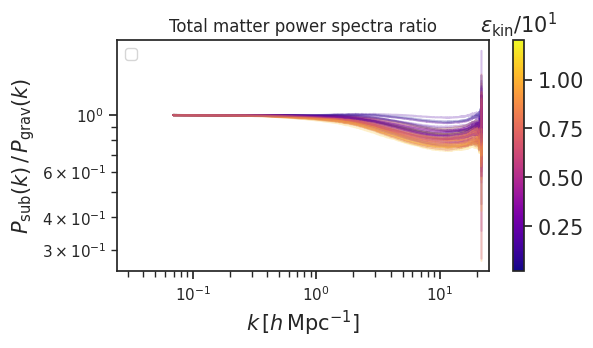

In [7]:
color_by_index = 4

plt_strings = plot_strings('Pk')
mlim1, mlim2 = mass_conds('Pk')

f, a = plt.subplots(1, 1, figsize=(6, 3))

# x, y, yerr = load_gsmf_obs(gsmf_obs_dir)
# mass_cond = np.where( (x > mlim1)  &  (x < mlim2) ) 
# a.errorbar(x[mass_cond], y[mass_cond], yerr=yerr[:, mass_cond][:, 0, :], fmt=".b", capsize=2, label=r"Driver 2022")

f = plot_lines_with_param_color(params32[:, color_by_index], 
                            k, 
                            pk_ratio, 
                            *plt_strings,
                            PARAM_NAME[color_by_index], 
                            mlim1, 
                            mlim2,
                            a);

a.set_xlim(0.5*mlim1, 2*mlim2)
a.set_xscale('log')
a.set_yscale('log')
# a.legend(bbox_to_anchor=(2, 0.7))
a.legend()

plt.title('Total matter power spectra ratio')

plt.savefig('plots/universal/Pk_design.png', bbox_inches='tight')

# Emulate stat-1: P(k) suppression

0.7252476318622862 1.0104413258935747
This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 255
m  =    61 (number of simulated data)
p  =     1 (number of inputs)
q  =     5 (number of additional simulation inputs)
pu NOT SET (transformed response dimension); call method create_K_basis 

Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1]]
lamUz
[[5. 5. 5. 5. 5. 5.]]
lamWs
[[100. 100. 100. 100. 100. 100.]]
lamWOs
[[100.]]


Step size tuning:   0%|          | 0/50 [00:00<?, ?it/s]

Step size tuning: 100%|██████████| 50/50 [01:01<00:00,  1.23s/it]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.32211787 1.07032994 0.85058038 3.38544032 0.53530892 0.43746711]
 [0.73945326 1.19333439 1.10902453 1.20975731 1.54526727 0.67987669]
 [0.26912781 1.44265943 2.3779611  0.87483511 0.42353413 0.52703577]
 [0.16385743 1.61169537 1.28084868 0.78468966 1.56079378 1.24687505]
 [0.6862153  0.95812541 1.1539044  0.31054885 1.46652123 0.90918024]
 [0.9370287  0.57858602 1.00769453 1.22688477 1.26876122 0.9005494 ]]
lamUz
[[1.17720958 1.26649791 1.02729327 1.18668162 1.32248626 1.0474383 ]]
lamWs
[[3800.10025157 3896.93809238 3152.80686703 4480.68071245 4676.71664488
  4164.0356752 ]]
lamWOs
[[1288.65226712]]


MCMC sampling: 100%|██████████| 1000/1000 [01:02<00:00, 16.12it/s]


Model saved to model/Pk_multivariate_model_z_index0.pkl
No thetas to plot


(None, <Figure size 1000x750 with 5 Axes>)

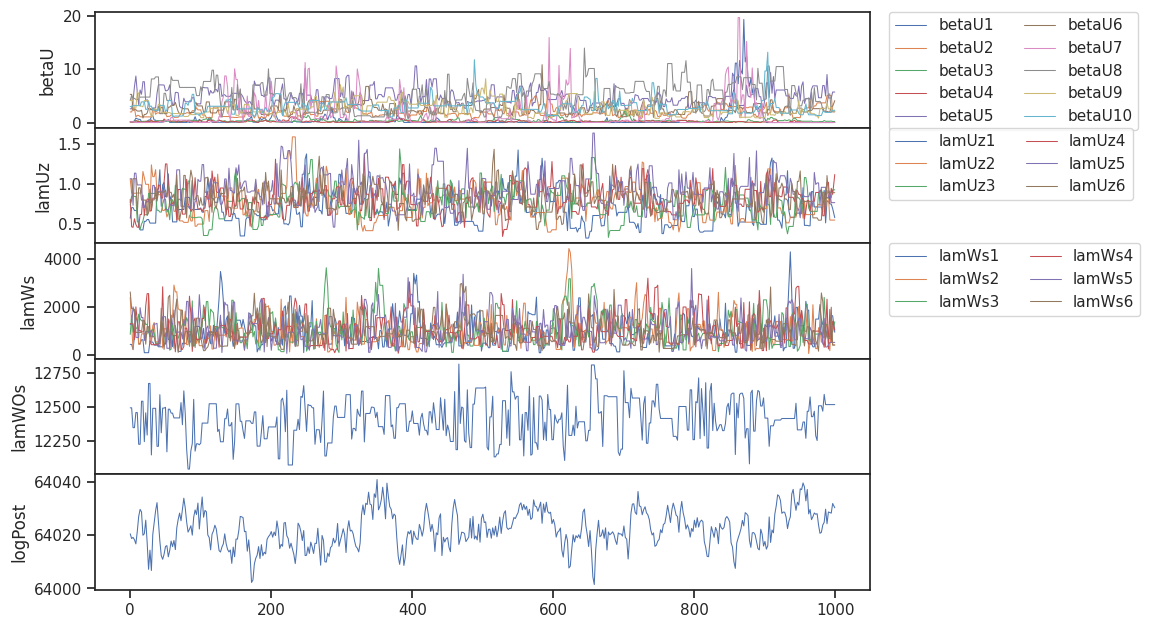

In [8]:
## Data prep
z_index = 0

plt_strings = plot_strings('Pk')
mlim1, mlim2 = mass_conds('Pk')
mass_cond = np.where( (k > mlim1)  &  (k < mlim2) ) 
# mass_cond = True

p_all = params32
# y_vals =  10**gsmf_arr_extra[:, mass_cond][:, 0, :]
y_vals =  pk_ratio[:, mass_cond][:, 0, :]

# y_vals =  gsmf_arr_extra[:, mass_cond][:, 0, :]

y_ind = k[mass_cond]#[0]

# y_vals1 =  np.log10(bhmsm_arr_extra[:, mass_cond1][:, 0, :])
# y_ind1 = 10**log_bhmsm_mass[mass_cond1]

print(y_vals.min(), y_vals.max())

#################################################################

# Train-test split
# test_indices = [0, 14, 22]
test_indices = [35, 45, 55]

input_params= p_all[test_indices] # p_all[test_indices]
target_vals = y_vals[test_indices] # Bk_all[:, z_index, :][test_indices]

train_indices = [i for i in  np.arange(num_sims) if i not in test_indices] 
p_all_train = p_all[train_indices]
y_vals_train = y_vals[train_indices]

#################################################################

## Fitting
sepia_data = sepia_data_format(p_all_train, y_vals_train, y_ind)
print(sepia_data)
model_filename = 'model/Pk_multivariate_model_z_index' + str(z_index) 

sepia_model = do_pca(sepia_data, exp_variance=exp_variance)
sepia_model = do_gp_train(sepia_model, model_filename)
sepia_model = gp_load(sepia_model, model_filename)
plot_train_diagnostics(sepia_model)

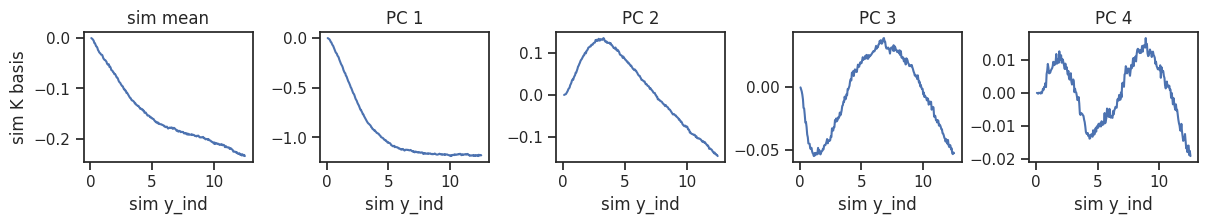

In [9]:
from sepia import SepiaPlot
SepiaPlot.plot_K_basis(sepia_data, max_plots=1);

Maximum relative error (mean): 0.0462 (4.62%)
Mean relative error (mean): 0.0160 (1.60%)
Maximum relative error (quantiles): 0.0713 (7.13%)
Mean relative error (quantiles): 0.0351 (3.51%)
0.7311623282437777 1.0128991497875444


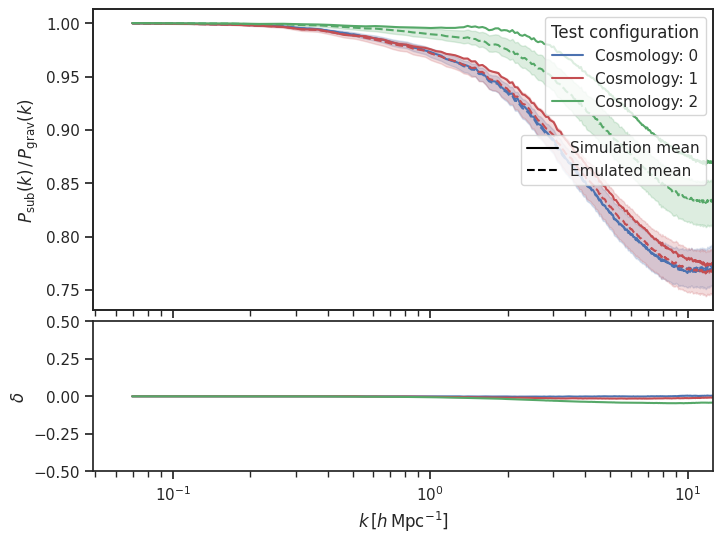

In [10]:
pred_mean, pred_quant = emulate(sepia_model, input_params)
# plt_strings = plot_strings('Pk')
# mlim1, mlim2 = mass_conds('Pk')
# mass_cond = np.where( (k > mlim1)  &  (k < mlim2) ) 

validation_plot( y_ind, target_vals, pred_mean, pred_quant, *plt_strings, mlim1, mlim2, 'log', 'linear');
plt.savefig('plots/universal/Pk_valid.png', bbox_inches='tight')

In [11]:
# import warnings
# warnings.simplefilter("ignore", UserWarning)
# import seaborn

# import numpy as np
# import os
# import matplotlib as mpl
# import matplotlib.pylab as plt
# import pandas as pd
# import sepia.SepiaPlot as SepiaPlot
# from sepia.SepiaModel import SepiaModel
# from sepia.SepiaData import SepiaData
# from matplotlib import ticker
# from itertools import cycle
# import matplotlib.colors as mcolors
# import matplotlib.cm as cm
# import pygtc
# from matplotlib.ticker import FormatStrFormatter

# def sensitivity_plot(k_all, # all wavenumbers
#                      params_all, # all parameters
#                      sepia_model, # SEPIA emulator model
#                      emulator_function, # function which takes in sepia model and parameters
#                      param_name, # Parameter name,
#                      title_str,
#                      xlabel_str,
#                      ylabel_str,
#                      mlim1,
#                      mlim2,
#                      x_scale,
#                      y_scale):

#     color_by_index = 0
#     colorparams = params_all[:, color_by_index]
#     # colorparams = X_test_transformed1[:, color_by_index]
#     colormap = cm.Dark2
#     normalize = mcolors.Normalize(vmin=np.min(colorparams), vmax=np.max(colorparams))

#     allMax = np.max(params_all, axis = 0)
#     allMin = np.min(params_all, axis = 0)
#     allMean = np.mean(params_all, axis = 0)

#     numPlots = 300

#     fig, ax = plt.subplots(params_all.shape[1], 1, figsize = (7, 15), sharex='col')
#     plt.subplots_adjust(wspace=0.25)
#     plt.subplots_adjust(hspace=0.05)
#     plt.suptitle(title_str, fontsize=18, y=0.9)

#     # Step 1: Determine the global y limits across all subplots
#     global_ylim1 = np.inf
#     global_ylim2 = -np.inf


#     for paramNo in range(params_all.shape[1]):
#             para_range = np.linspace(allMin[paramNo], allMax[paramNo], numPlots)        
#             # colorList = plt.cm.coolwarm(np.linspace(0,1,numPlots))

#             colormap = cm.coolwarm
#             normalize = mcolors.Normalize(vmin=np.min(allMin[paramNo]), vmax=allMax[paramNo])

#             for plotID in range(numPlots):
#                     para_plot = np.copy(allMean)
#                     para_plot[paramNo] = para_range[plotID]  #### allMean gets changed everytime!!

#                     color = colormap(normalize(para_plot[paramNo]))

#                     gsmf_decoded, _ = emulator_function(sepia_model, para_plot)

#                     lineObj = ax[paramNo].plot(k_all, gsmf_decoded, lw= 1, color = color, alpha=0.7) 

#                     ax[paramNo].set_yscale(y_scale)
#                     ax[paramNo].set_xscale(x_scale)
#                     ax[paramNo].set_ylabel(ylabel_str, fontsize=18)
#                     ax[paramNo].set_yticks([], minor = True)
                    
#                     # ax[paramNo].set_xlim(mlim1, mlim2)
#                     #
#                     # ax[paramNo].set_ylim(ylim1, ylim2)
#                     global_ylim1 = min(global_ylim1, np.min(gsmf_decoded))
#                     global_ylim2 = max(global_ylim2, np.max(gsmf_decoded))

                            
            
#             # Colorbar setup
#             s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
#             s_map.set_array(colorparams)

#             # If color parameters is a linspace, we can set boundaries in this way
#             halfdist = (colorparams[1] - colorparams[0])/2.0
#             boundaries = np.linspace(colorparams[0] - halfdist, colorparams[-1] + halfdist, len(colorparams) + 1)

#             cbar = fig.colorbar(s_map, spacing='proportional', ax=ax[paramNo])

#             cbarlabel = param_name[paramNo]
#             cbar.set_label(cbarlabel, fontsize=20)
            
#         #     ylim1, ylim2 = ax[paramNo].get_ylim()
#         #     if mlim1 !=None: ax[paramNo].fill_between(k_all, 0.8*ylim1, 1.2*ylim2, where=(k_all < mlim1), color='k', alpha=0.1)
#         #     if mlim1 !=None: ax[paramNo].fill_between(k_all, 0.8*ylim1, 1.2*ylim2, where=(k_all > mlim2), color='k', alpha=0.1)

#         #     ax[paramNo].set_ylim(ylim1, ylim2)
#     ax[paramNo].set_xlabel(xlabel_str, fontsize=18)
#     # plt.show()

#     # Step 2: Apply the same y limits to all subplots
#     for paramNo in range(params_all.shape[1]):
#         ax[paramNo].set_ylim(global_ylim1, global_ylim2)

#         if mlim1 is not None:
#             ax[paramNo].fill_between(k_all, 0.8 * global_ylim1, 1.2 * global_ylim2, where=(k_all < mlim1), color='k', alpha=0.1)
#             ax[paramNo].fill_between(k_all, 0.8 * global_ylim1, 1.2 * global_ylim2, where=(k_all > mlim2), color='k', alpha=0.1)

    
#     return fig


In [12]:
import warnings
warnings.simplefilter("ignore", UserWarning)
import seaborn

import numpy as np
import os
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd
import sepia.SepiaPlot as SepiaPlot
from sepia.SepiaModel import SepiaModel
from sepia.SepiaData import SepiaData
from matplotlib import ticker
from itertools import cycle
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pygtc
from matplotlib.ticker import FormatStrFormatter

import warnings
warnings.simplefilter("ignore", UserWarning)
import seaborn

import numpy as np
import os
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd
import sepia.SepiaPlot as SepiaPlot
from sepia.SepiaModel import SepiaModel
from sepia.SepiaData import SepiaData
from matplotlib import ticker
from itertools import cycle
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pygtc
from matplotlib.ticker import FormatStrFormatter, MaxNLocator


def sensitivity_plot(k_all, # all wavenumbers
                     params_all, # all parameters
                     sepia_model, # SEPIA emulator model
                     emulator_function, # function which takes in sepia model and parameters
                     param_name, # Parameter name,
                     title_str,
                     xlabel_str,
                     ylabel_str,
                     mlim1,
                     mlim2,
                     x_scale,
                     y_scale):

    color_by_index = 0
    colorparams = params_all[:, color_by_index]
    colormap = cm.Dark2
    normalize = mcolors.Normalize(vmin=np.min(colorparams), vmax=np.max(colorparams))

    allMax = np.max(params_all, axis=0)
    allMin = np.min(params_all, axis=0)
    allMean = np.mean(params_all, axis=0)

    numPlots = 300

    fig, ax = plt.subplots(params_all.shape[1], 1, figsize=(7, 15), sharex='col')
    plt.subplots_adjust(wspace=0.25, hspace=0.05)
    plt.suptitle(title_str, fontsize=18, y=0.9)

    # Step 1: Determine the global y limits across all subplots
    global_ylim1 = np.inf
    global_ylim2 = -np.inf

    for paramNo in range(params_all.shape[1]):
        para_range = np.linspace(allMin[paramNo], allMax[paramNo], numPlots)        

        colormap = cm.coolwarm
        normalize = mcolors.Normalize(vmin=allMin[paramNo], vmax=allMax[paramNo])

        for plotID in range(numPlots):
            para_plot = np.copy(allMean)
            para_plot[paramNo] = para_range[plotID] 

            color = colormap(normalize(para_plot[paramNo]))

            gsmf_decoded, _ = emulator_function(sepia_model, para_plot)

            ax[paramNo].plot(k_all, gsmf_decoded, lw=1, color=color, alpha=0.7)

            ax[paramNo].set_yscale(y_scale)
            ax[paramNo].set_xscale(x_scale)
            ax[paramNo].set_ylabel(ylabel_str, fontsize=18)
            ax[paramNo].set_yticks([], minor=True)

            # Update global ylim
            global_ylim1 = min(global_ylim1, np.min(gsmf_decoded))
            global_ylim2 = max(global_ylim2, np.max(gsmf_decoded))

        # Colorbar setup
        s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
        s_map.set_array(colorparams)

        cbar = fig.colorbar(s_map, spacing='proportional', ax=ax[paramNo])
        cbar.set_label(param_name[paramNo], fontsize=20)

    # Step 2: Apply the same y limits to all subplots
    for paramNo in range(params_all.shape[1]):
        ax[paramNo].set_ylim(global_ylim1, global_ylim2)

        # Reduce the number of ticks to 4
        ax[paramNo].yaxis.set_major_locator(MaxNLocator(nbins=4))
        # ax[paramNo].xaxis.set_major_locator(MaxNLocator(nbins=4))


        if mlim1 is not None:
            ax[paramNo].fill_between(k_all, 0.8 * global_ylim1, 1.2 * global_ylim2, where=(k_all < mlim1), color='k', alpha=0.1)
            ax[paramNo].fill_between(k_all, 0.8 * global_ylim1, 1.2 * global_ylim2, where=(k_all > mlim2), color='k', alpha=0.1)

    ax[-1].set_xlabel(xlabel_str, fontsize=18)

    return fig


In [13]:
if if_plot_sensi:
    f = sensitivity_plot( y_ind, p_all, sepia_model, emulate, PARAM_NAME, *plt_strings, mlim1, mlim2, 'log', 'linear')
    plt.savefig('plots/universal/Pk_sensi_HACC5p.png', bbox_inches='tight')

In [14]:
mlim1, mlim2, y_ind.min(), y_ind.max()

(0.04908738521234052, 12.566370614359172, 0.06952845, 12.52504)

In [15]:
pred_mean

array([[0.99995854, 0.99994939, 1.00005969],
       [0.9993551 , 0.99927802, 0.99976736],
       [0.99885798, 0.99868693, 0.99960151],
       [0.99789944, 0.99759085, 0.99905317],
       [0.99701742, 0.99659533, 0.99898502],
       [0.99514639, 0.99430088, 0.99829494],
       [0.99440865, 0.9936349 , 0.99806182],
       [0.99237897, 0.9915052 , 0.99726616],
       [0.99066231, 0.98939131, 0.99642679],
       [0.9892112 , 0.98816961, 0.99565187],
       [0.98718442, 0.98623204, 0.99506411],
       [0.98572713, 0.98448989, 0.99495478],
       [0.98382072, 0.98271086, 0.99417051],
       [0.98165665, 0.98054964, 0.99340944],
       [0.98023509, 0.9791296 , 0.99278324],
       [0.9794551 , 0.97839489, 0.99226204],
       [0.97705147, 0.97615024, 0.9913662 ],
       [0.97576086, 0.97517788, 0.99090662],
       [0.97443046, 0.97410394, 0.99025882],
       [0.97198995, 0.97173653, 0.98962734],
       [0.97046815, 0.9700916 , 0.98922067],
       [0.96897421, 0.968798  , 0.98888536],
       [0.